# Homework Assignment 2 - Chem 277B
## Breast Cancer Prediction

**1) Objective**

Analyze the Breast Cancer Wisconsin dataset, classify cancer cells using Naive Bayes models, and evaluate performance using a confusion matrix.

<br>

**2) Preparation**

Before starting, import the necessary libraries for data analysis and visualization. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

<br>

**3) Dataset**

Load the dataset from `sklearn`, which contains cell descriptors and a target variable (diagnosis: 0 = malignant, 1 = benign).

In [2]:
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

Split the dataset into training (80%) and testing (20%) sets. Use `random_state=42` for reproducibility.

In [5]:
######## Fill in the code below ########
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
########################################

print(f'Number of training samples: {X_train.shape[0]}')
print(f'- Number of malignant samples: {y_train[y_train==0].shape[0]} ({y_train[y_train==0].shape[0]/y_train.shape[0]*100:.1f}%)')
print(f'- Number of benign samples: {y_train[y_train==1].shape[0]} ({y_train[y_train==1].shape[0]/y_train.shape[0]*100:.1f}%)')
print(f'Number of test samples: {X_test.shape[0]}')
print(f'- Number of malignant samples: {y_test[y_test==0].shape[0]} ({y_test[y_test==0].shape[0]/y_test.shape[0]*100:.1f}%)')
print(f'- Number of benign samples: {y_test[y_test==1].shape[0]} ({y_test[y_test==1].shape[0]/y_test.shape[0]*100:.1f}%)')

Number of training samples: 455
- Number of malignant samples: 169 (37.1%)
- Number of benign samples: 286 (62.9%)
Number of test samples: 114
- Number of malignant samples: 43 (37.7%)
- Number of benign samples: 71 (62.3%)


<br>

**4) Visualize**

Use the *mean radius* (the first feature) to create two histograms: one for malignant cells and one for benign cells. Overlay the two histograms to visualize the distribution of this feature for both classes. Discuss any similarities or differences.

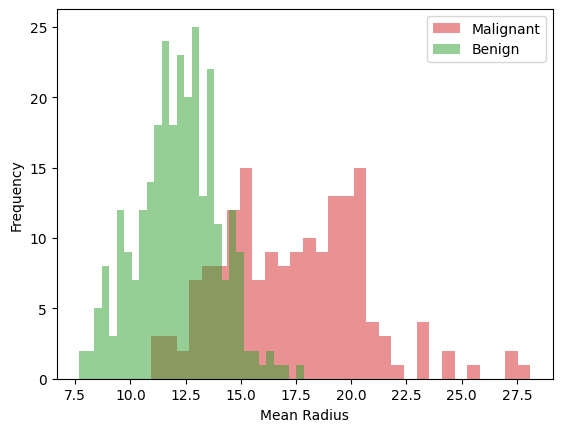

In [6]:
plt.figure()

######## Fill in the code below ########
X_train['mean radius'][y_train == 0].plot(kind='hist', bins=30, alpha=0.5, label='Malignant', color='tab:red')
X_train['mean radius'][y_train == 1].plot(kind='hist', bins=30, alpha=0.5, label='Benign', color='tab:green')
########################################

plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram for malignant cells peaks at a lower value, while the histogram for benign cells peaks at a higher value. This indicates that mean radius could be a useful feature for distinguishing between the two classes. Both distributions look roughly Gaussian, suggesting that a Gaussian Naive Bayes classifier could be effective.

Also use the *mean fractal dimension* (the ninth feature) to create two histograms. Compare the distributions with those from the *mean radius*. Which feature appears to better separate the two classes?

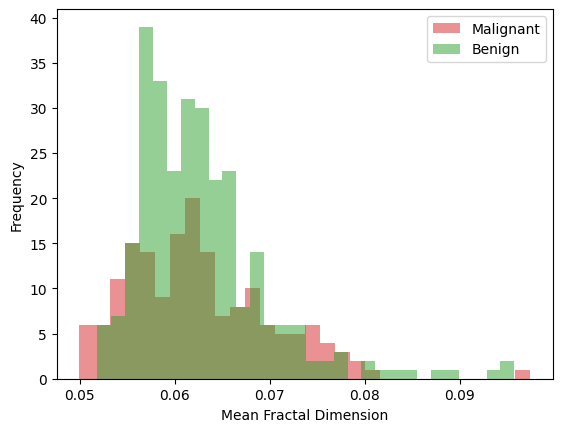

In [7]:
plt.figure()

######## Fill in the code below ########
X_train['mean fractal dimension'][y_train == 0].plot(kind='hist', bins=30, alpha=0.5, label='Malignant', color='tab:red')
X_train['mean fractal dimension'][y_train == 1].plot(kind='hist', bins=30, alpha=0.5, label='Benign', color='tab:green')
########################################

plt.xlabel('Mean Fractal Dimension')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram for mean fractal dimension shows a lot more overlap between the two classes compared to mean radius. While there are still small differences in the distributions, they are less pronounced. Therefore, mean radius appears to be a better feature for separating malignant and benign cells than mean fractal dimension.

<br>

**5) Naive Bayes Classification**

Train a Gaussian Naive Bayes classifier using only *mean radius* and discuss its accuracy.

Accuracy using mean radius: 0.93


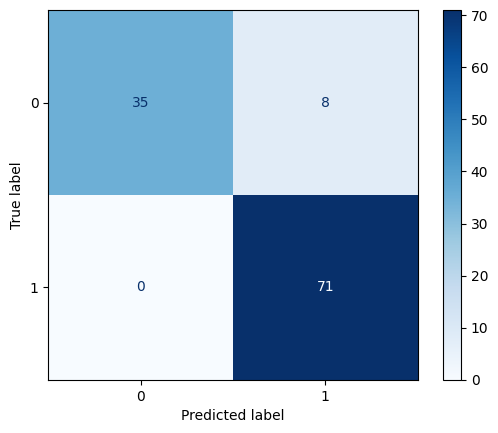

In [8]:
######## Fill in the code below ########
scaler   = MinMaxScaler(feature_range = (0, 1))
X_trainS = scaler.fit_transform(X_train[['mean radius']])
X_testS  = scaler.transform(X_test[['mean radius']])

gnb = GaussianNB()
gnb.fit(X_trainS, y_train)
y_pred = gnb.predict(X_testS)
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean radius: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

As expected, the Gaussian Naive Bayes classifier using only mean radius performs reasonably well, achieving an accuracy of around 93%. This indicates that mean radius is a strong predictor for distinguishing between malignant and benign cells.

Train another Gaussian Naive Bayes classifier using only *mean fractal dimension* and discuss its accuracy.

Accuracy using mean fractal dimension: 0.62


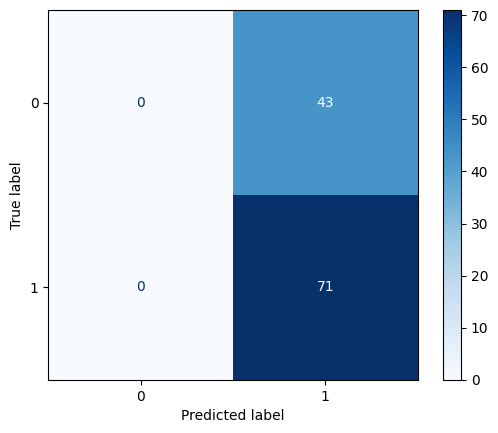

In [9]:
######## Fill in the code below ########
scaler = MinMaxScaler(feature_range = (0, 1))
X_trainS = scaler.fit_transform(X_train[['mean fractal dimension']])
X_testS = scaler.transform(X_test[['mean fractal dimension']])

gnb = GaussianNB()
gnb.fit(X_trainS, y_train)
y_pred = gnb.predict(X_testS)
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean fractal dimension: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Since mean fractal dimension shows significant overlap between the two classes, the Gaussian Naive Bayes classifier using this feature alone almost does not separate the two classes, resulting in a lower accuracy of around 62%. The prediction is dominated by the prior distribution of the classes, and no malignant samples are ever predicted.

Also train a Gaussian Naive Bayes classifier using both *mean radius* and *mean fractal dimension* and evaluate its accuracy. Don't forget to scale the features now! How does this compare to the previous two models?

Accuracy using mean radius and mean fractal dimension: 0.93


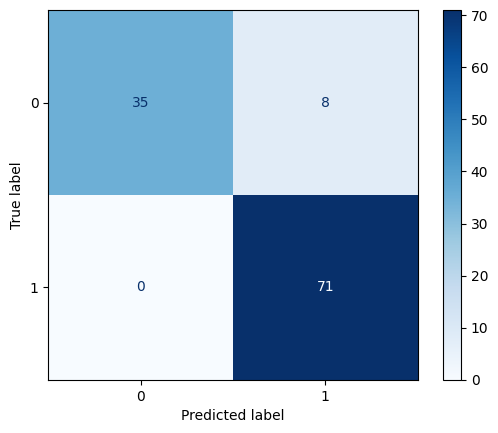

In [10]:
######## Fill in the code below ########
scaler = MinMaxScaler(feature_range = (0, 1)) 
X_TrainS = scaler.fit_transform(X_train[['mean radius', 'mean fractal dimension']])
X_TestS = scaler.transform(X_test[['mean radius', 'mean fractal dimension']])

gnb = GaussianNB()
gnb.fit(X_TrainS, y_train)
y_pred = gnb.predict(X_TestS)
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean radius and mean fractal dimension: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The prediction is very similar/identical to the model using only mean radius, with an accuracy of around 93%. This suggests that adding mean fractal dimension does not provide additional useful information for classification beyond what is already captured by mean radius, but it does not harm the performance either.

Lastly, train a Gaussian Naive Bayes classifier using all 30 features and evaluate its accuracy. Compare the performance of this model to the previous models.

Accuracy using all features: 0.96


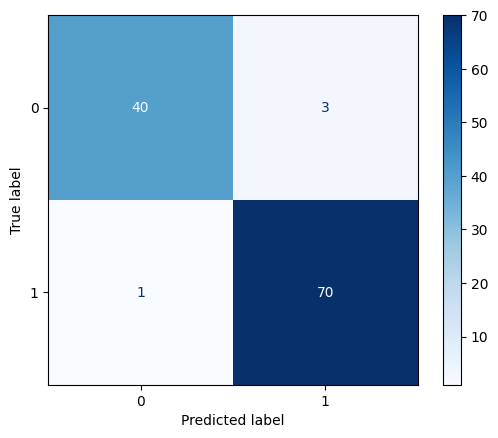

In [11]:
######## Fill in the code below ########
scaler = MinMaxScaler(feature_range = (0, 1)) 
X_TrainS = scaler.fit_transform(X_train)
X_TestS = scaler.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_TrainS, y_train)
y_pred = gnb.predict(X_TestS)
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model using all 30 features achieves a significantly higher accuracy of around 96%. This indicates that while mean radius is a strong predictor, incorporating additional features allows the model to capture more complex patterns in the data, leading to improved classification performance.

<br>

**6) Feature Analysis**

One assumption of Naive Bayes is that the features are mutually independent. Generate a heatmap of Pearsons (pairwise) correlation coefficient. Which features correlate? Does the correlation make sense?

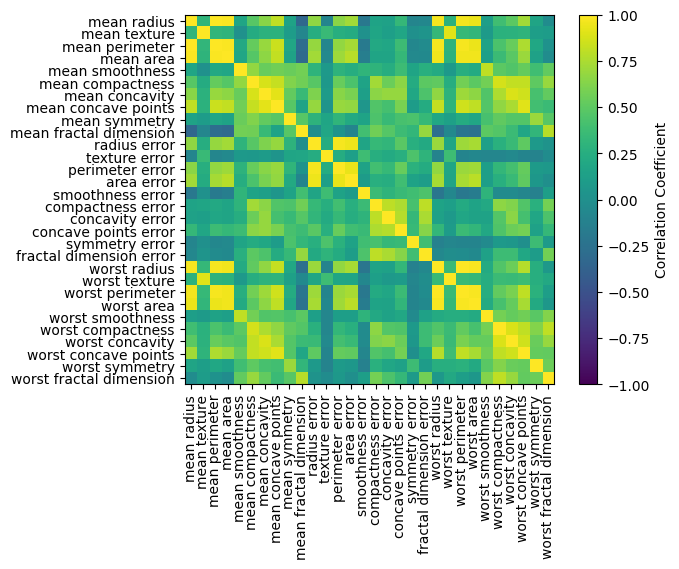

In [12]:
######## Fill in the code below ########
plt.imshow(X_train.corr(), vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, rotation=90)
plt.yticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns)
plt.show()
########################################

We see that, for example, mean radius highly correlates with eg. *mean perimeter*, *mean area* and *worst radius*. These features naturally correlate because radius and area are related via an actual equation.

Remove three of the features that show high correlation with another feature and run the analysis you did in 5) again. Compare the accuray to the value you optain when you include all features.

Accuracy using all features: 0.95


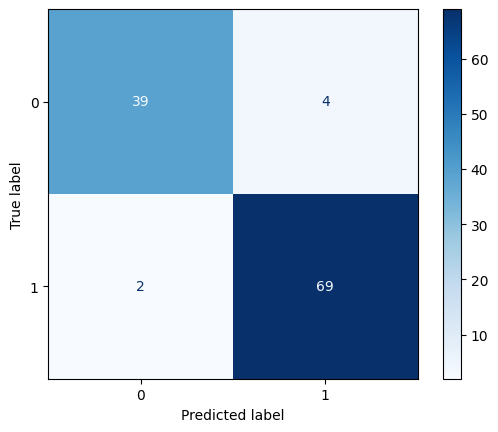

In [13]:
######## Fill in the code below ########
scaler = MinMaxScaler(feature_range = (0, 1)) 
X_TrainS = scaler.fit_transform(X_train.drop(columns = ['mean perimeter', 'mean area', 'worst radius']))
X_TestS = scaler.transform(X_test.drop(columns = ['mean perimeter', 'mean area', 'worst radius']))

gnb = GaussianNB()
gnb.fit(X_TrainS, y_train)
y_pred = gnb.predict(X_TestS)
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Even though three of the highly correlated features got removed, the accuracy did not drop.